# 01 • EDA (Bank Term Deposit)

In [38]:
# Imports & paths
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

PROJ = Path.cwd()
DATA = None
for p in [PROJ/'data', PROJ.parent/'data', PROJ.parent.parent/'data']:
    if (p/'train.csv').exists() and (p/'test.csv').exists():
        DATA = p; break
assert DATA is not None, 'data/train.csv or data/test.csv not found'

train = pd.read_csv(DATA/'train.csv')
test  = pd.read_csv(DATA/'test.csv')
train.shape, test.shape

((750000, 18), (250000, 17))

In [39]:
# Basic info
display(train.head(5))
print("\\nColumns:", list(train.columns))
print("\\nDtypes:")
print(train.dtypes.sort_index())

print("\\nMissing values per column (train):")
print(train.isna().sum())

dup_cnt = train.duplicated().sum()
print(f"\\nDuplicate rows in train: {dup_cnt}")

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


\nColumns: ['id', 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
\nDtypes:
age           int64
balance       int64
campaign      int64
contact      object
day           int64
default      object
duration      int64
education    object
housing      object
id            int64
job          object
loan         object
marital      object
month        object
pdays         int64
poutcome     object
previous      int64
y             int64
dtype: object
\nMissing values per column (train):
id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
\nDuplicate rows in train: 0


In [40]:
# Target distribution
tar = train['y'].value_counts(normalize=True).rename('ratio')
display(tar.to_frame())
pos_weight = (train['y']==0).sum()/(train['y']==1).sum()
print("Pos weight (neg/pos):", round(pos_weight, 3))

,ratio
y,
0,0.879349
1,0.120651


Pos weight (neg/pos): 7.288


,age,balance,day,duration,campaign,pdays,previous,y
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,40.926395,1204.067397,16.117209,256.229144,2.577008,22.412733,0.298545,0.120651
std,10.098829,2836.096759,8.250832,272.555662,2.718514,77.319998,1.335926,0.325721
min,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,634.000000,17.000000,133.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1390.000000,21.000000,361.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,99717.000000,31.000000,4918.000000,63.000000,871.000000,200.000000,1.000000


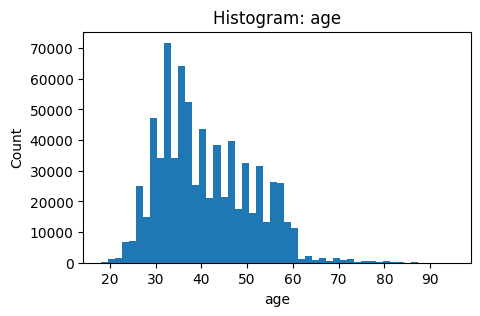

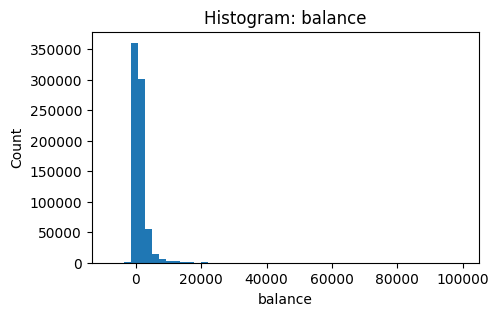

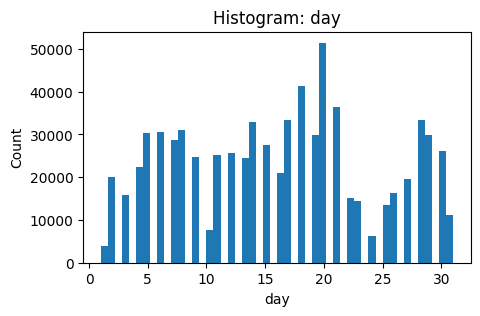

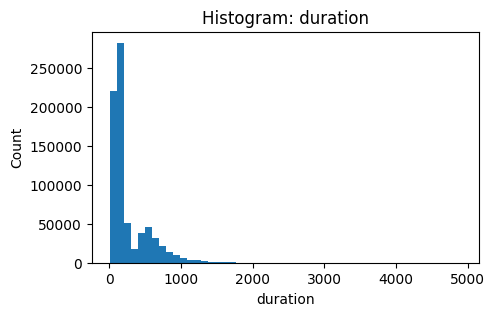

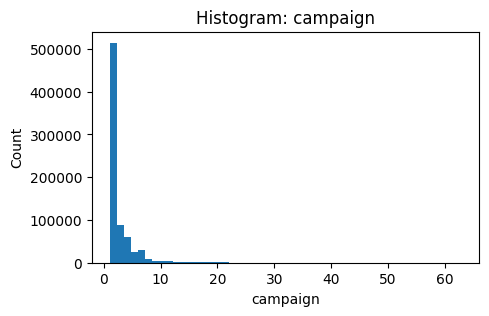

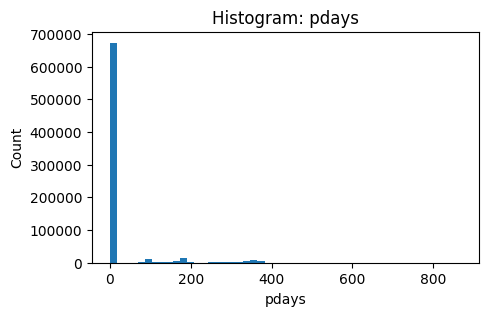

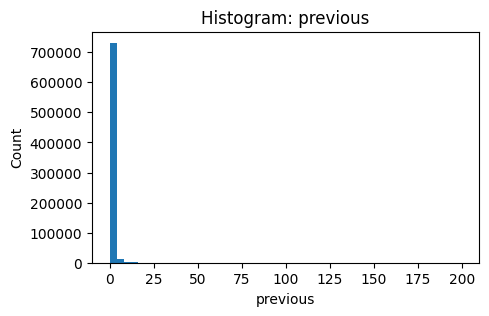

In [41]:
#Numeric overview
num_cols = ['age','balance','day','duration','campaign','pdays','previous']
desc = train[num_cols+['y']].describe()
display(desc)

# Simple histograms (one figure per feature for clarity)
for c in num_cols:
    fig = plt.figure(figsize=(5,3))
    plt.hist(train[c], bins=50)
    plt.title(f"Histogram: {c}")
    plt.xlabel(c); plt.ylabel("Count")
    plt.show()

In [42]:
#Categorical overview
cat_cols = ['job','marital','education','default','housing','loan','contact','month','poutcome']
print("Categoricals:", cat_cols)

card = {c: train[c].nunique() for c in cat_cols}
print("\\nCardinality:")
for k,v in card.items():
    print(f"  {k}: {v}")

print("\\nTop levels (train):")
for c in cat_cols:
    print(f"\\n== {c} ==")
    display(train[c].value_counts().head(10))

Categoricals: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
\nCardinality:
  job: 12
  marital: 3
  education: 4
  default: 2
  housing: 2
  loan: 2
  contact: 3
  month: 12
  poutcome: 4
\nTop levels (train):
\n== job ==


job
management       175541
blue-collar      170498
technician       138107
admin.            81492
services          64209
retired           35185
self-employed     19020
entrepreneur      17718
unemployed        17634
housemaid         15912
Name: count, dtype: int64

\n== marital ==


marital
married     480759
single      194834
divorced     74407
Name: count, dtype: int64

\n== education ==


education
secondary    401683
tertiary     227508
primary       99510
unknown       21299
Name: count, dtype: int64

\n== default ==


default
no     737151
yes     12849
Name: count, dtype: int64

\n== housing ==


housing
yes    411288
no     338712
Name: count, dtype: int64

\n== loan ==


loan
no     645023
yes    104977
Name: count, dtype: int64

\n== contact ==


contact
cellular     486655
unknown      231627
telephone     31718
Name: count, dtype: int64

\n== month ==


month
may    228411
aug    128859
jul    110647
jun     93670
nov     66062
apr     41319
feb     37611
jan     18937
oct      9204
sep      7409
Name: count, dtype: int64

\n== poutcome ==


poutcome
unknown    672450
failure     45115
success     17691
other       14744
Name: count, dtype: int64

In [43]:
#Target rate by categorical
rates = {}
for c in cat_cols:
    g = train.groupby(c)['y'].mean().sort_values(ascending=False)
    rates[c] = g
    print(f"\\n== {c}: target rate (top 10) ==")
    display(g.head(10).to_frame('y_mean'))

\n== job: target rate (top 10) ==


,y_mean
job,
student,0.340784
retired,0.246241
unemployed,0.179823
management,0.150392
self-employed,0.129443
unknown,0.120672
technician,0.118321
admin.,0.116453
housemaid,0.084653


\n== marital: target rate (top 10) ==


,y_mean
marital,
single,0.170453
divorced,0.111576
married,0.101872


\n== education: target rate (top 10) ==


,y_mean
education,
tertiary,0.162649
unknown,0.133387
secondary,0.105491
primary,0.083097


\n== default: target rate (top 10) ==


,y_mean
default,
no,0.121947
yes,0.046307


\n== housing: target rate (top 10) ==


,y_mean
housing,
no,0.175778
yes,0.075251


\n== loan: target rate (top 10) ==


,y_mean
loan,
no,0.131378
yes,0.054736


\n== contact: target rate (top 10) ==


,y_mean
contact,
cellular,0.156579
telephone,0.136799
unknown,0.042953


\n== month: target rate (top 10) ==


,y_mean
month,
mar,0.571355
sep,0.534755
dec,0.513291
oct,0.490004
apr,0.235654
feb,0.206801
jan,0.124148
aug,0.112161
nov,0.109806


\n== poutcome: target rate (top 10) ==


,y_mean
poutcome,
success,0.764004
other,0.166848
failure,0.132794
unknown,0.101898


\n== duration ==


/var/folders/wz/6fpyxr655r90v21bcbtx7ml00000gn/T/ipykernel_83178/166734130.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  out = df.groupby(bc)['y'].mean()


,y_mean
duration,
"(0.999, 27.0]",0.004173
"(27.0, 63.0]",0.001390
"(63.0, 74.0]",0.000495
"(74.0, 83.0]",0.001317
"(83.0, 91.0]",0.001938
"(91.0, 101.0]",0.009610
"(101.0, 108.0]",0.003963
"(108.0, 115.0]",0.011620
"(115.0, 124.0]",0.006233


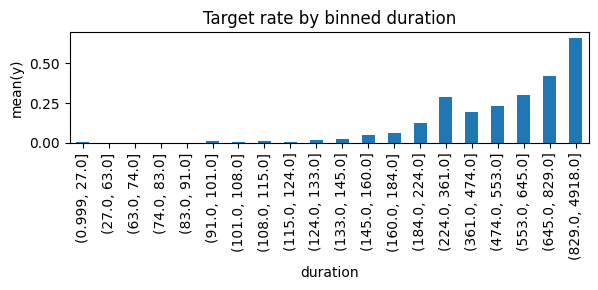

\n== campaign ==


/var/folders/wz/6fpyxr655r90v21bcbtx7ml00000gn/T/ipykernel_83178/166734130.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  out = df.groupby(bc)['y'].mean()


,y_mean
campaign,
"(0.999, 2.0]",0.136844
"(2.0, 3.0]",0.105635
"(3.0, 5.0]",0.082335
"(5.0, 63.0]",0.059738


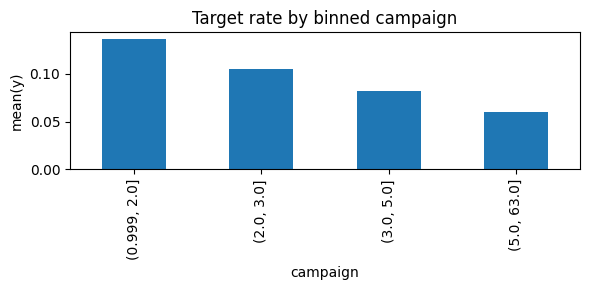

\n== pdays ==


/var/folders/wz/6fpyxr655r90v21bcbtx7ml00000gn/T/ipykernel_83178/166734130.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  out = df.groupby(bc)['y'].mean()


,y_mean
pdays,
"(-1.001, 87.0]",0.103686
"(87.0, 871.0]",0.274443


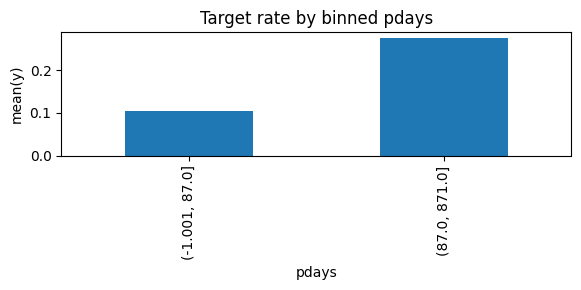

\n== balance ==


/var/folders/wz/6fpyxr655r90v21bcbtx7ml00000gn/T/ipykernel_83178/166734130.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  out = df.groupby(bc)['y'].mean()


,y_mean
balance,
"(-8019.001, -287.0]",0.029747
"(-287.0, -63.0]",0.022356
"(-63.0, 0.0]",0.040933
"(0.0, 11.0]",0.040496
"(11.0, 97.0]",0.057919
"(97.0, 476.0]",0.164509
"(476.0, 556.0]",0.144272
"(556.0, 634.0]",0.121671
"(634.0, 719.0]",0.129469


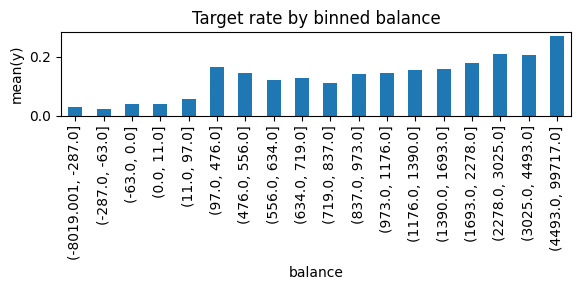

\n== age ==


/var/folders/wz/6fpyxr655r90v21bcbtx7ml00000gn/T/ipykernel_83178/166734130.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  out = df.groupby(bc)['y'].mean()


,y_mean
age,
"(17.999, 30.0]",0.183734
"(30.0, 32.0]",0.113020
"(32.0, 34.0]",0.112468
"(34.0, 36.0]",0.111206
"(36.0, 39.0]",0.100454
"(39.0, 42.0]",0.090629
"(42.0, 46.0]",0.092775
"(46.0, 51.0]",0.084443
"(51.0, 56.0]",0.093917


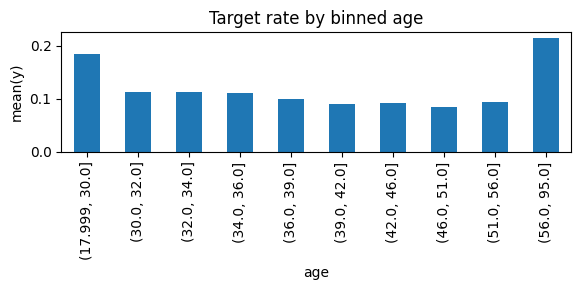

In [44]:
#Binned numeric vs target
def binned_target(df, col, q=20):
    q_eff = min(q, df[col].nunique())
    bc = pd.qcut(df[col], q=q_eff, duplicates='drop')
    out = df.groupby(bc)['y'].mean()
    return out

for c, q in [('duration', 20), ('campaign', 10), ('pdays', 10), ('balance', 20), ('age', 10)]:
    print(f"\\n== {c} ==")
    out = binned_target(train, c, q=q)
    display(out.to_frame('y_mean'))
    fig = plt.figure(figsize=(6,3))
    out.plot(kind='bar')
    plt.title(f"Target rate by binned {c}")
    plt.ylabel("mean(y)")
    plt.tight_layout()
    plt.show()

In [45]:
#Correlations (numeric) + MI
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OneHotEncoder

corr = train[num_cols+['y']].corr(numeric_only=True)['y'].drop('y').sort_values(key=lambda s: s.abs(), ascending=False)
display(corr.to_frame('corr_with_y'))

# Prepare X for MI: numeric + one-hot for categoricals
X_num = train[num_cols].copy()
X_cat = train[cat_cols].astype(str).copy()

try:
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
except TypeError:
    ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

X_cat_ohe = ohe.fit_transform(X_cat)
ohe_cols = ohe.get_feature_names_out(cat_cols)
X = np.hstack([X_num.to_numpy(dtype=float), X_cat_ohe])
y = train['y'].to_numpy()

mi = mutual_info_classif(X, y, discrete_features=[False]*X_num.shape[1] + [True]*X_cat_ohe.shape[1], random_state=42)
mi_ser = pd.Series(mi, index=list(X_num.columns)+list(ohe_cols)).sort_values(ascending=False)
print("Top 25 features by mutual information:")
display(mi_ser.head(25).to_frame('MI'))

,corr_with_y
duration,0.519283
balance,0.122513
previous,0.119552
pdays,0.089277
campaign,-0.075829
day,-0.049625
age,0.009523


Top 25 features by mutual information:


,MI
duration,0.154963
balance,0.069889
pdays,0.029586
poutcome_success,0.027095
campaign,0.024991
age,0.018425
contact_unknown,0.014968
day,0.014325
contact_cellular,0.012600
housing_yes,0.011822


In [46]:
#Simple train-vs-test drift (numeric PSI)
def population_stability_index(a, b, bins=20, eps=1e-9):
    a = pd.Series(a).astype(float)
    b = pd.Series(b).astype(float)
    bins = np.unique(np.quantile(a.dropna(), np.linspace(0,1,bins+1)))
    a_hist, _ = np.histogram(a, bins=bins)
    b_hist, _ = np.histogram(b, bins=bins)
    a_rat = a_hist / max(a_hist.sum(), eps)
    b_rat = b_hist / max(b_hist.sum(), eps)
    psi = ((a_rat - b_rat) * np.log((a_rat + eps)/(b_rat + eps))).sum()
    return float(psi)

psi_rows = []
for c in num_cols:
    psi = population_stability_index(train[c], test[c], bins=20)
    psi_rows.append((c, psi))
psi_df = pd.DataFrame(psi_rows, columns=['feature','PSI']).sort_values('PSI', ascending=False)
print("PSI guide: <0.1 small shift, 0.1–0.25 moderate, >0.25 large")
display(psi_df)

PSI guide: <0.1 small shift, 0.1–0.25 moderate, >0.25 large


,feature,PSI
0,age,1.357015e-04
1,balance,1.171139e-04
3,duration,7.680848e-05
2,day,5.389045e-05
4,campaign,8.181511e-06
5,pdays,7.145715e-06
6,previous,4.791029e-07


/var/folders/wz/6fpyxr655r90v21bcbtx7ml00000gn/T/ipykernel_83178/61409351.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = d.groupby('bin')['y'].mean()


,y_mean
bin,
"(0.999, 27.0]",0.004173
"(27.0, 63.0]",0.001390
"(63.0, 74.0]",0.000495
"(74.0, 83.0]",0.001317
"(83.0, 91.0]",0.001938
"(91.0, 101.0]",0.009610
"(101.0, 108.0]",0.003963
"(108.0, 115.0]",0.011620
"(115.0, 124.0]",0.006233


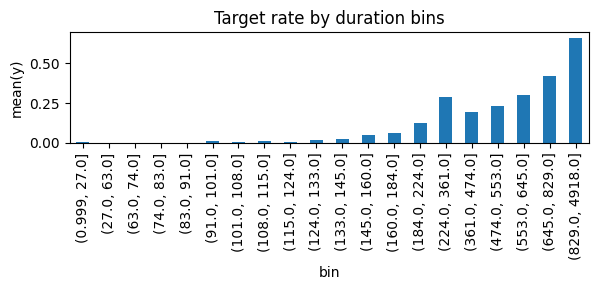

In [47]:
#A closer look at duration
d = train[['duration','y']].copy()
d['bin'] = pd.qcut(d['duration'], q=min(20, d['duration'].nunique()), duplicates='drop')
g = d.groupby('bin')['y'].mean()
display(g.to_frame('y_mean'))

fig = plt.figure(figsize=(6,3))
g.plot(kind='bar')
plt.title("Target rate by duration bins")
plt.ylabel("mean(y)")
plt.tight_layout()
plt.show()

In [48]:
#Categorical slices that matter
for c in ['job','month','poutcome','contact']:
    print(f"\\n== {c} (top 10 levels by y) ==")
    display(train.groupby(c)['y'].mean().sort_values(ascending=False).head(10).to_frame('y_mean'))

\n== job (top 10 levels by y) ==


,y_mean
job,
student,0.340784
retired,0.246241
unemployed,0.179823
management,0.150392
self-employed,0.129443
unknown,0.120672
technician,0.118321
admin.,0.116453
housemaid,0.084653


\n== month (top 10 levels by y) ==


,y_mean
month,
mar,0.571355
sep,0.534755
dec,0.513291
oct,0.490004
apr,0.235654
feb,0.206801
jan,0.124148
aug,0.112161
nov,0.109806


\n== poutcome (top 10 levels by y) ==


,y_mean
poutcome,
success,0.764004
other,0.166848
failure,0.132794
unknown,0.101898


\n== contact (top 10 levels by y) ==


,y_mean
contact,
cellular,0.156579
telephone,0.136799
unknown,0.042953


## Key takeaways

- **Class imbalance:** ~12% positive class; `scale_pos_weight ≈ 7.3` is reasonable in tree models.
- **Dominant signal:** `duration` is the strongest single driver; careful clipping/log transforms help.
- **Strong categorical slices:** `month` (campaign timing), `poutcome` (previous outcome), `contact` (channel) carry signal.
- **Mild drift:** PSI shows generally small-to-moderate shifts between train and test on numerics.